In [1]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn
!pip install imbalanced-learn
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#ignore future changes to libraries
import warnings
warnings.filterwarnings('ignore')
#loading dataset
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
#checking for non-null entries
df.info()
#shape
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


(920, 16)

In [4]:
# Evaluation of missing data from dataset with percentages
df.isnull().sum().sort_values(ascending=True)
df.isnull().mean()*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

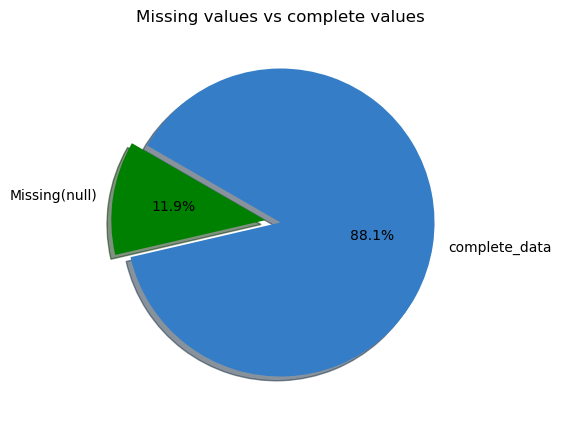

In [5]:
#conducting EDA on misssing set, age, sex, and cholesterol level
# (EDA) Visualizing percentage of missing values from dataset
missing_values = df.isnull().sum().sum() #missing values (double sum elimniates value error)
total = df.size  #total values
missing_portion = missing_values / total
non_missing_portion = 1 - missing_portion

#pie graph
labels = ["Missing(null)", "complete_data"]
sizes = [missing_portion, non_missing_portion]
colors = ['#008000', '#357EC7']
explode = 0.1, 0 # exploding missing values
plt.figure(figsize = (6, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("Missing values vs complete values")
plt.show()

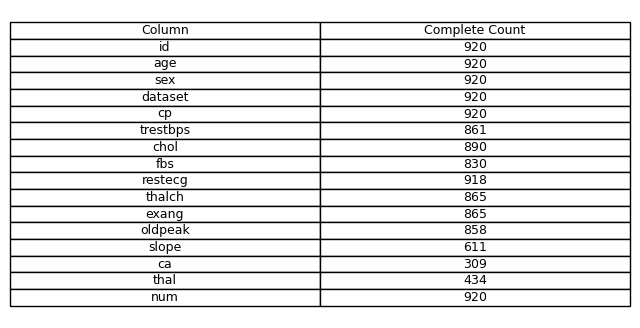

minimum age:  28
maximum age:  77


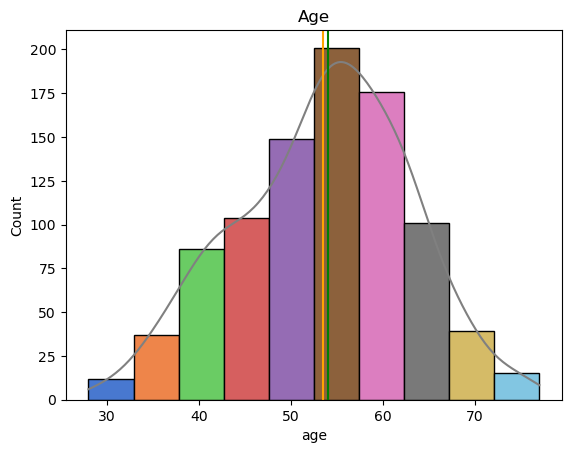

In [6]:
#EDA understanding dataset contd
#Data count 
info_dc = pd.DataFrame({
    'Column': df.columns,
    'Complete Count': df.notnull().sum(),
})
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=info_dc.values, colLabels=info_dc.columns, cellLoc = 'center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1)

plt.savefig('dataframe_info.png', bbox_inches='tight', dpi=300)
plt.show()
#Age
#EDA to get age differences from dataset
print(f"minimum age: ", df['age'].min())
print (f"maximum age: ", df['age'].max())

n_bars = len(df['age'].unique())
colors = sns.color_palette("muted", n_colors=n_bars)

# histogram of the 'age' column with a kernel density estimate (KDE)
bins = 10
sns.histplot(df['age'], kde=True, bins=bins, color='grey', edgecolor='black')

# custom color palette to each bar 
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i % n_bars])

# vertical lines representing the mean and median of the 'age' column
plt.axvline(df['age'].mean(), color='orange')
plt.axvline(df['age'].median(), color='Green')

plt.title('Age')
plt.show()

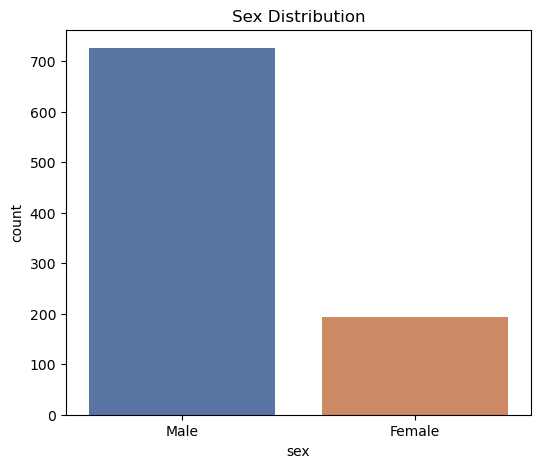

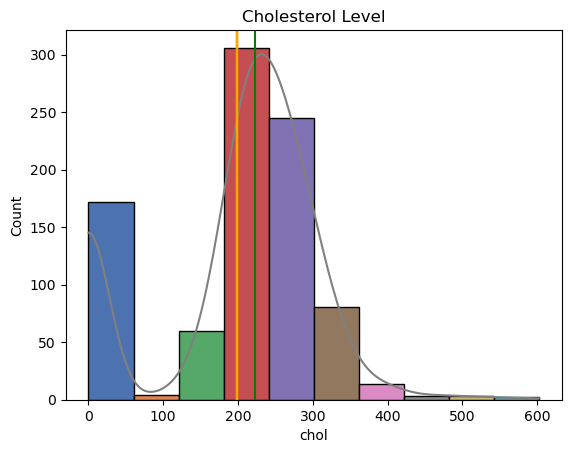

Chest Pain Type (cp) Categories:
0: Typical Angina - Related to decreased blood supply
1: Atypical Angina - Not heart related
2: Non-Anginal Pain - Other causes
3: Asymptomatic - No chest pain but heart disease present


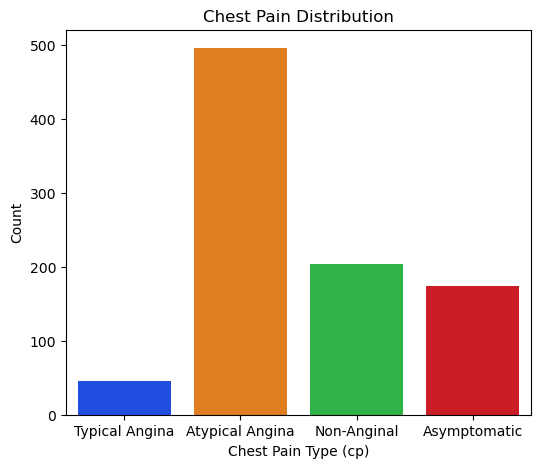

In [7]:
# EDA contd
# EDA for sex col and origin
# Sex Distribution
sex = df['sex'].describe()
palette = {"Male": "#0000FF", "Female": "#FF69B4"}
plt.figure(figsize = (6, 5))
sns.countplot(x='sex', data=df, palette='deep') # count plot for sex cols
plt.title('Sex Distribution')
plt.show()

# Cholesterol level
chol = df['chol'].describe()
n_bars = len(df['chol'].unique())
colors = sns.color_palette("deep", n_colors=n_bars)
bins = 10
sns.histplot(df['chol'], kde=True, bins=bins, color='grey', edgecolor='black')
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i % n_bars])
    plt.axvline(df['chol'].mean(), color='orange') # custom line for mean level of chol
plt.axvline(df['chol'].median(), color='Green')# custom line for median level of chol

plt.title('Cholesterol Level')
plt.show()

#Chest pain analysis
cp_types = {
    0: "Typical Angina - Related to decreased blood supply",
    1: "Atypical Angina - Not heart related",
    2: "Non-Anginal Pain - Other causes",
    3: "Asymptomatic - No chest pain but heart disease present"
}
print("Chest Pain Type (cp) Categories:")
for key, value in cp_types.items():
    print(f"{key}: {value}")
plt.figure(figsize=(6, 5))
sns.countplot(x='cp', data=df, palette='bright')
plt.title('Chest Pain Distribution')
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Typical Angina", "Atypical Angina", "Non-Anginal", "Asymptomatic"])
plt.show()

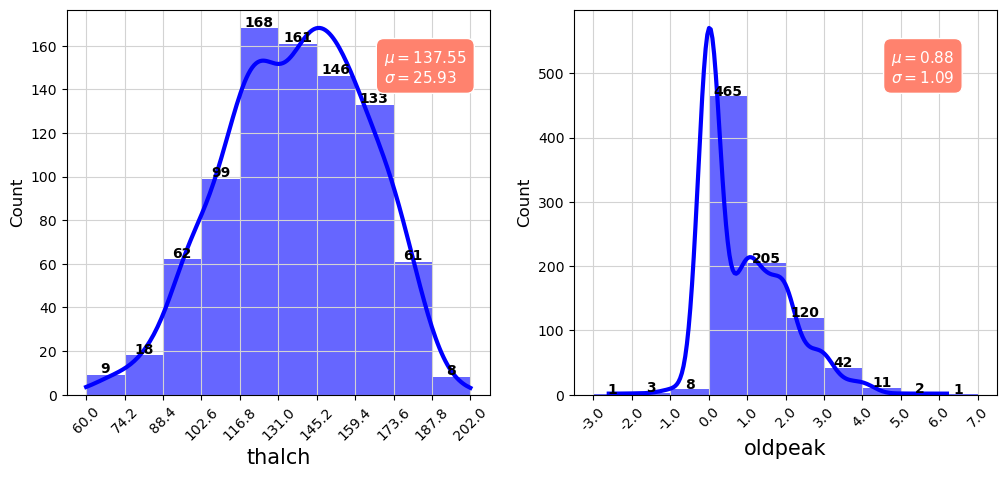

In [8]:
#EDA for the distribution of continious variables
#talch and origin
df_selected = df[['thalch', 'oldpeak']]
#Subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
#Loop over selected columns
for i, col in enumerate(df_selected.columns):
    values, bin_edges = np.histogram(df_selected[col], 
                                     range=(np.floor(df_selected[col].min()), np.ceil(df_selected[col].max())))

    graph = sns.histplot(data=df_selected, x=col, bins=bin_edges, kde=True, ax=ax[i],
                         edgecolor='none', color='blue', alpha=0.6, line_kws={'lw': 3})

    ax[i].set_xlabel(col, fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_xticks(np.round(bin_edges, 1))
    ax[i].set_xticklabels(ax[i].get_xticks(), rotation=45)
    ax[i].grid(color='lightgrey')
    #Annotate heights
    for p in graph.patches:
        ax[i].annotate('{}'.format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                       ha='center', fontsize=10, fontweight="bold")
    #Display mean and std
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_selected[col].mean(),
        r'$\sigma=%.2f$' % df_selected[col].std()
    ))
    ax[i].text(0.75, 0.9, textstr, transform=ax[i].transAxes, fontsize=11, verticalalignment='top',
               color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))
plt.show()

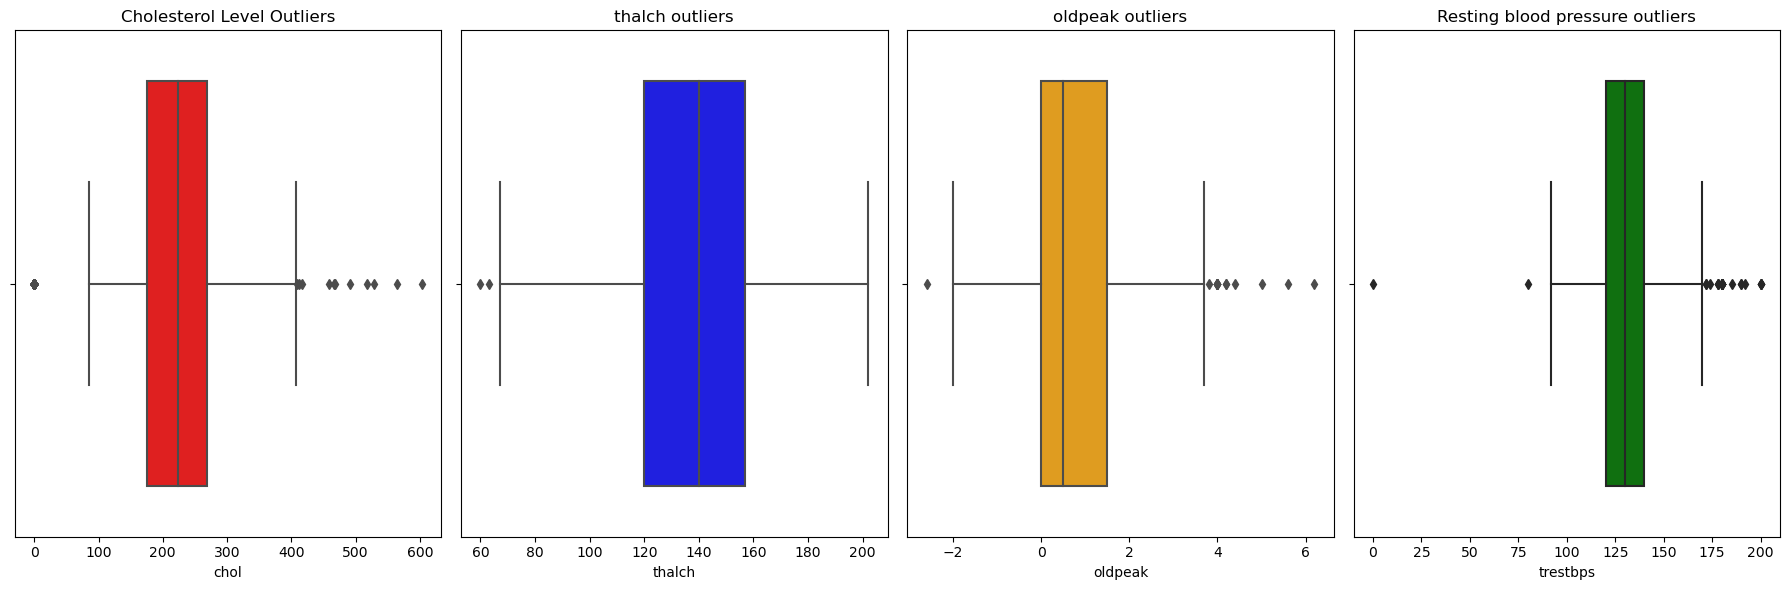

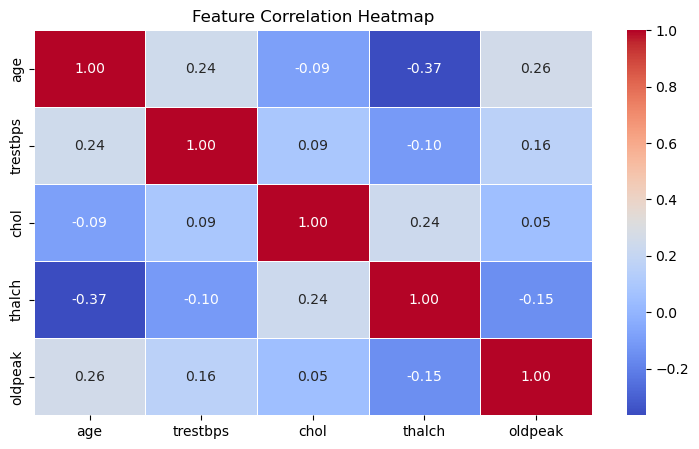

In [9]:
# EDA for outliers numerical columns (age excluded no outliers)
plt.figure(figsize=(18,6))
plt.subplot(1, 4, 1)
sns.boxplot(x=df['chol'], color='red')
plt.title('Cholesterol Level Outliers')
plt.subplot(1, 4, 2)
sns.boxplot(x=df['thalch'], color='blue')
plt.title('thalch outliers')
plt.subplot(1, 4, 3)
sns.boxplot(x=df['oldpeak'], color='orange')
plt.title('oldpeak outliers')
plt.subplot(1, 4, 4)
sns.boxplot(x=df['trestbps'], color='green')  #Outlier of 0 (patient considered dead)
plt.title('Resting blood pressure outliers')
plt.tight_layout()
plt.show()
#Heatmap
df_encoded = df.copy()
#Encoding categories
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(lambda x: pd.factorize(x)[0])
#Correlation analysis to know most infulential value in prediction analysis
df_corr = ['age','trestbps','chol','thalch','oldpeak']
plt.figure(figsize=(9, 5))
sns.heatmap(df[df_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
#Dealing with null data (Data Cleaning)
# Mean for missing numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Mode for missing categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
df.shape

(920, 16)

In [11]:
#Dealing with outliers using IQR
numeric_df = df.select_dtypes(include=['int64', 'float64']) # Selecting numerical cols
Q1 = numeric_df.quantile(0.25)  
Q3 = numeric_df.quantile(0.75)  
IQR = Q3 - Q1 
outlier_mask = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
df["Outlier"] = outlier_mask.any(axis=1)

# Ensuring original val remains intact
print(df["Outlier"].value_counts())

# Capping outliers by replacing with boundary values
df_capped = df.copy()
for col in numeric_df.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound,  upper_bound, df_capped[col])

Outlier
True     501
False    419
Name: count, dtype: int64


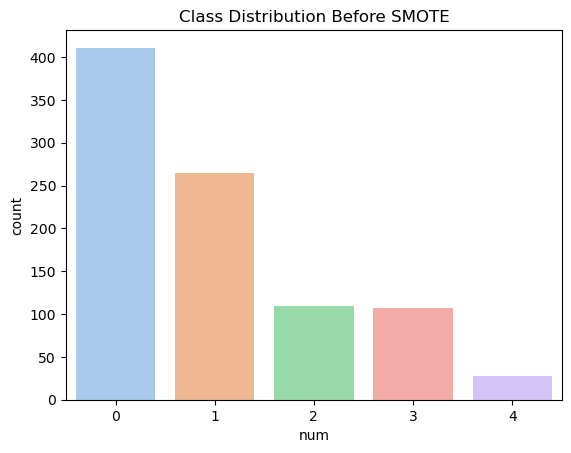

Data Preprocessing and SMOTE applied. Saved to disk.
Before SMOTE - Class Distribution: num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64
After SMOTE - Class Distribution: num
0    288
1    288
3    288
2    288
4    288
Name: count, dtype: int64


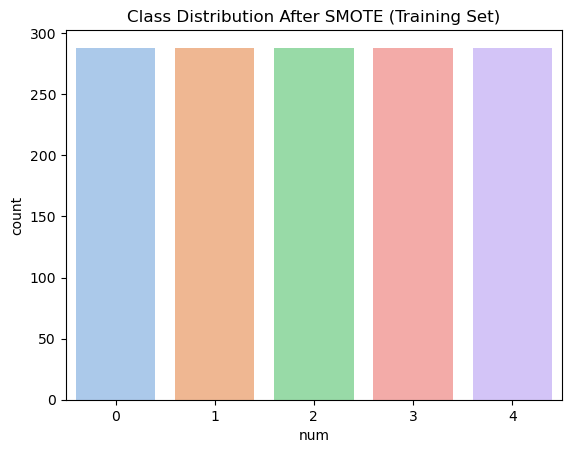

In [ ]:
# Target == num
sns.countplot(x=df['num'], palette='pastel')
plt.title('Class Distribution Before SMOTE')
plt.show()


X = df.drop(columns=['num', 'Outlier'])
y = df['num']

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal']

# Column transformer to handle both categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['age']),
        ('cat', OneHotEncoder(), categorical_cols)  # categorical columns
    ])

# Splitting data 30 % testing 70 % training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Splitting training set into 90% training 10% validation
#X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)  
# Applying transformations to training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
# Transformatioons to validation data
#X_val_encoded = preprocessor.transform(X_val)
#X_test_encoded = preprocessor.transform(X_test)
# Applying SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

np.savez('train_data.npz', X_train=X_train_resampled, y_train=y_train_resampled)
np.savez('test_data.npz', X_test=X_test_encoded, y_test=y_test)
#np.savez('val_data.npz', X_val=X_val, y_val=y_val)

print("Data Preprocessing and SMOTE applied. Saved to disk.")

# Before and after SMOTE
print(f"Before SMOTE - Class Distribution: {y.value_counts()}")
print(f"After SMOTE - Class Distribution: {y_train_resampled.value_counts()}")

sns.countplot(x=y_train_resampled, palette='pastel')
plt.title('Class Distribution After SMOTE (Training Set)')
plt.show()

Raw Data Model Performance:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       123
           1       0.47      0.46      0.47        80
           2       0.22      0.24      0.23        33
           3       0.21      0.25      0.23        32
           4       0.00      0.00      0.00         8

    accuracy                           0.51       276
   macro avg       0.34      0.34      0.34       276
weighted avg       0.54      0.51      0.52       276

Cleaned Data Model Performance:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       123
           1       0.47      0.46      0.47        80
           2       0.22      0.24      0.23        33
           3       0.21      0.25      0.23        32
           4       0.00      0.00      0.00         8

    accuracy                           0.51       276
   macro avg       0.34      0.34      0.34       276
weighted avg     

Text(0, 0.5, 'Accuracy')

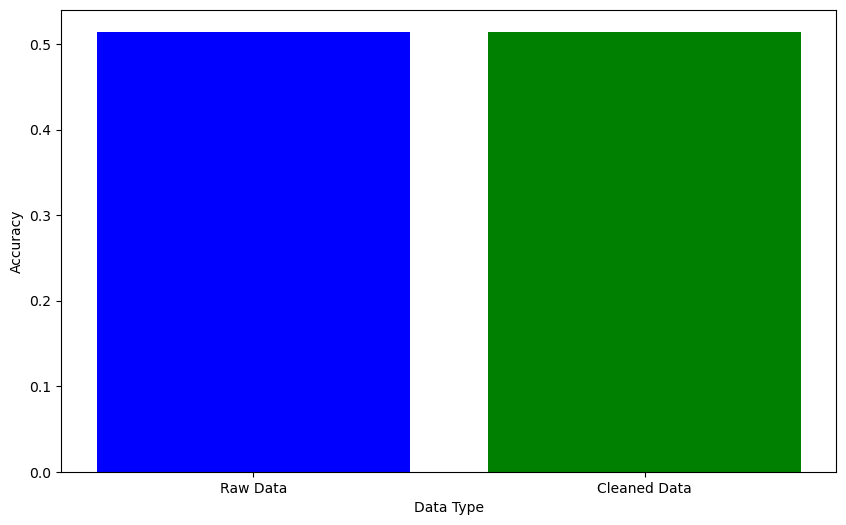

In [13]:
X_raw = df.drop(columns=['num'])
y_raw = df['num']
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.3, random_state=42, stratify=y_raw)

# Processing raw data
X_train_encoded_raw = preprocessor.fit_transform(X_train_raw)
X_test_encoded_raw = preprocessor.transform(X_test_raw)

# Applying SMOTE only to the raw training set
smote = SMOTE(random_state=42)
X_train_resampled_raw, y_train_resampled_raw = smote.fit_resample(X_train_encoded_raw, y_train_raw)

# Model training and evaluation for raw data
model_raw = XGBClassifier()
model_raw.fit(X_train_resampled_raw, y_train_resampled_raw)
y_pred_raw = model_raw.predict(X_test_encoded_raw)

# Metrics for raw data
print("Raw Data Model Performance:")
print(classification_report(y_test_raw, y_pred_raw))
#ConfusionMatrixDisplay(confusion_matrix(y_test_raw, y_pred_raw)).plot(cmap="Blues")
plt.show()

# Now for cleaned data
X = df.drop(columns=['num'])
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Applying transformations to training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Applying SMOTE only to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

# Model training and evaluation for cleaned data
model_cleaned = XGBClassifier()
model_cleaned.fit(X_train_resampled, y_train_resampled)
y_pred_cleaned = model_cleaned.predict(X_test_encoded)

# Metrics for cleaned data
print("Cleaned Data Model Performance:")
print(classification_report(y_test, y_pred_cleaned))
#ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_cleaned)).plot(cmap="Blues")
plt.show()

# Plotting the comparison
labels = ['Raw Data', 'Cleaned Data']
accuracy = [accuracy_score(y_test_raw, y_pred_raw), accuracy_score(y_test, y_pred_cleaned)]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracy, color=['blue', 'green'])
plt.xlabel('Data Type')
plt.ylabel('Accuracy')

In [14]:
#XGBoost call
import subprocess

# Call XGBoost.py
result = subprocess.run(['python', 'XGBoost.py'], capture_output=True, text=True)

print(result.stdout)

# Check if there were any errors
if result.stderr:
    print("Errors from XGBoost.py:", result.stderr)

Optimal Decision Threshold: 0.39096358

Accuracy: 0.8405797101449275

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79       123
           1       0.79      0.97      0.87       153

    accuracy                           0.84       276
   macro avg       0.87      0.83      0.83       276
weighted avg       0.86      0.84      0.84       276


Confusion Matrix:
 [[ 84  39]
 [  5 148]]



In [15]:
print((X_train_encoded == X_train_encoded_raw).all())

print("Training Accuracy (Raw):", accuracy_score(y_train_resampled_raw, model_raw.predict(X_train_resampled_raw)))
print("Training Accuracy (Cleaned):", accuracy_score(y_train_resampled, model_cleaned.predict(X_train_resampled)))

True
Training Accuracy (Raw): 0.9659722222222222
Training Accuracy (Cleaned): 0.9659722222222222


Pairplot of All Numerical Features:


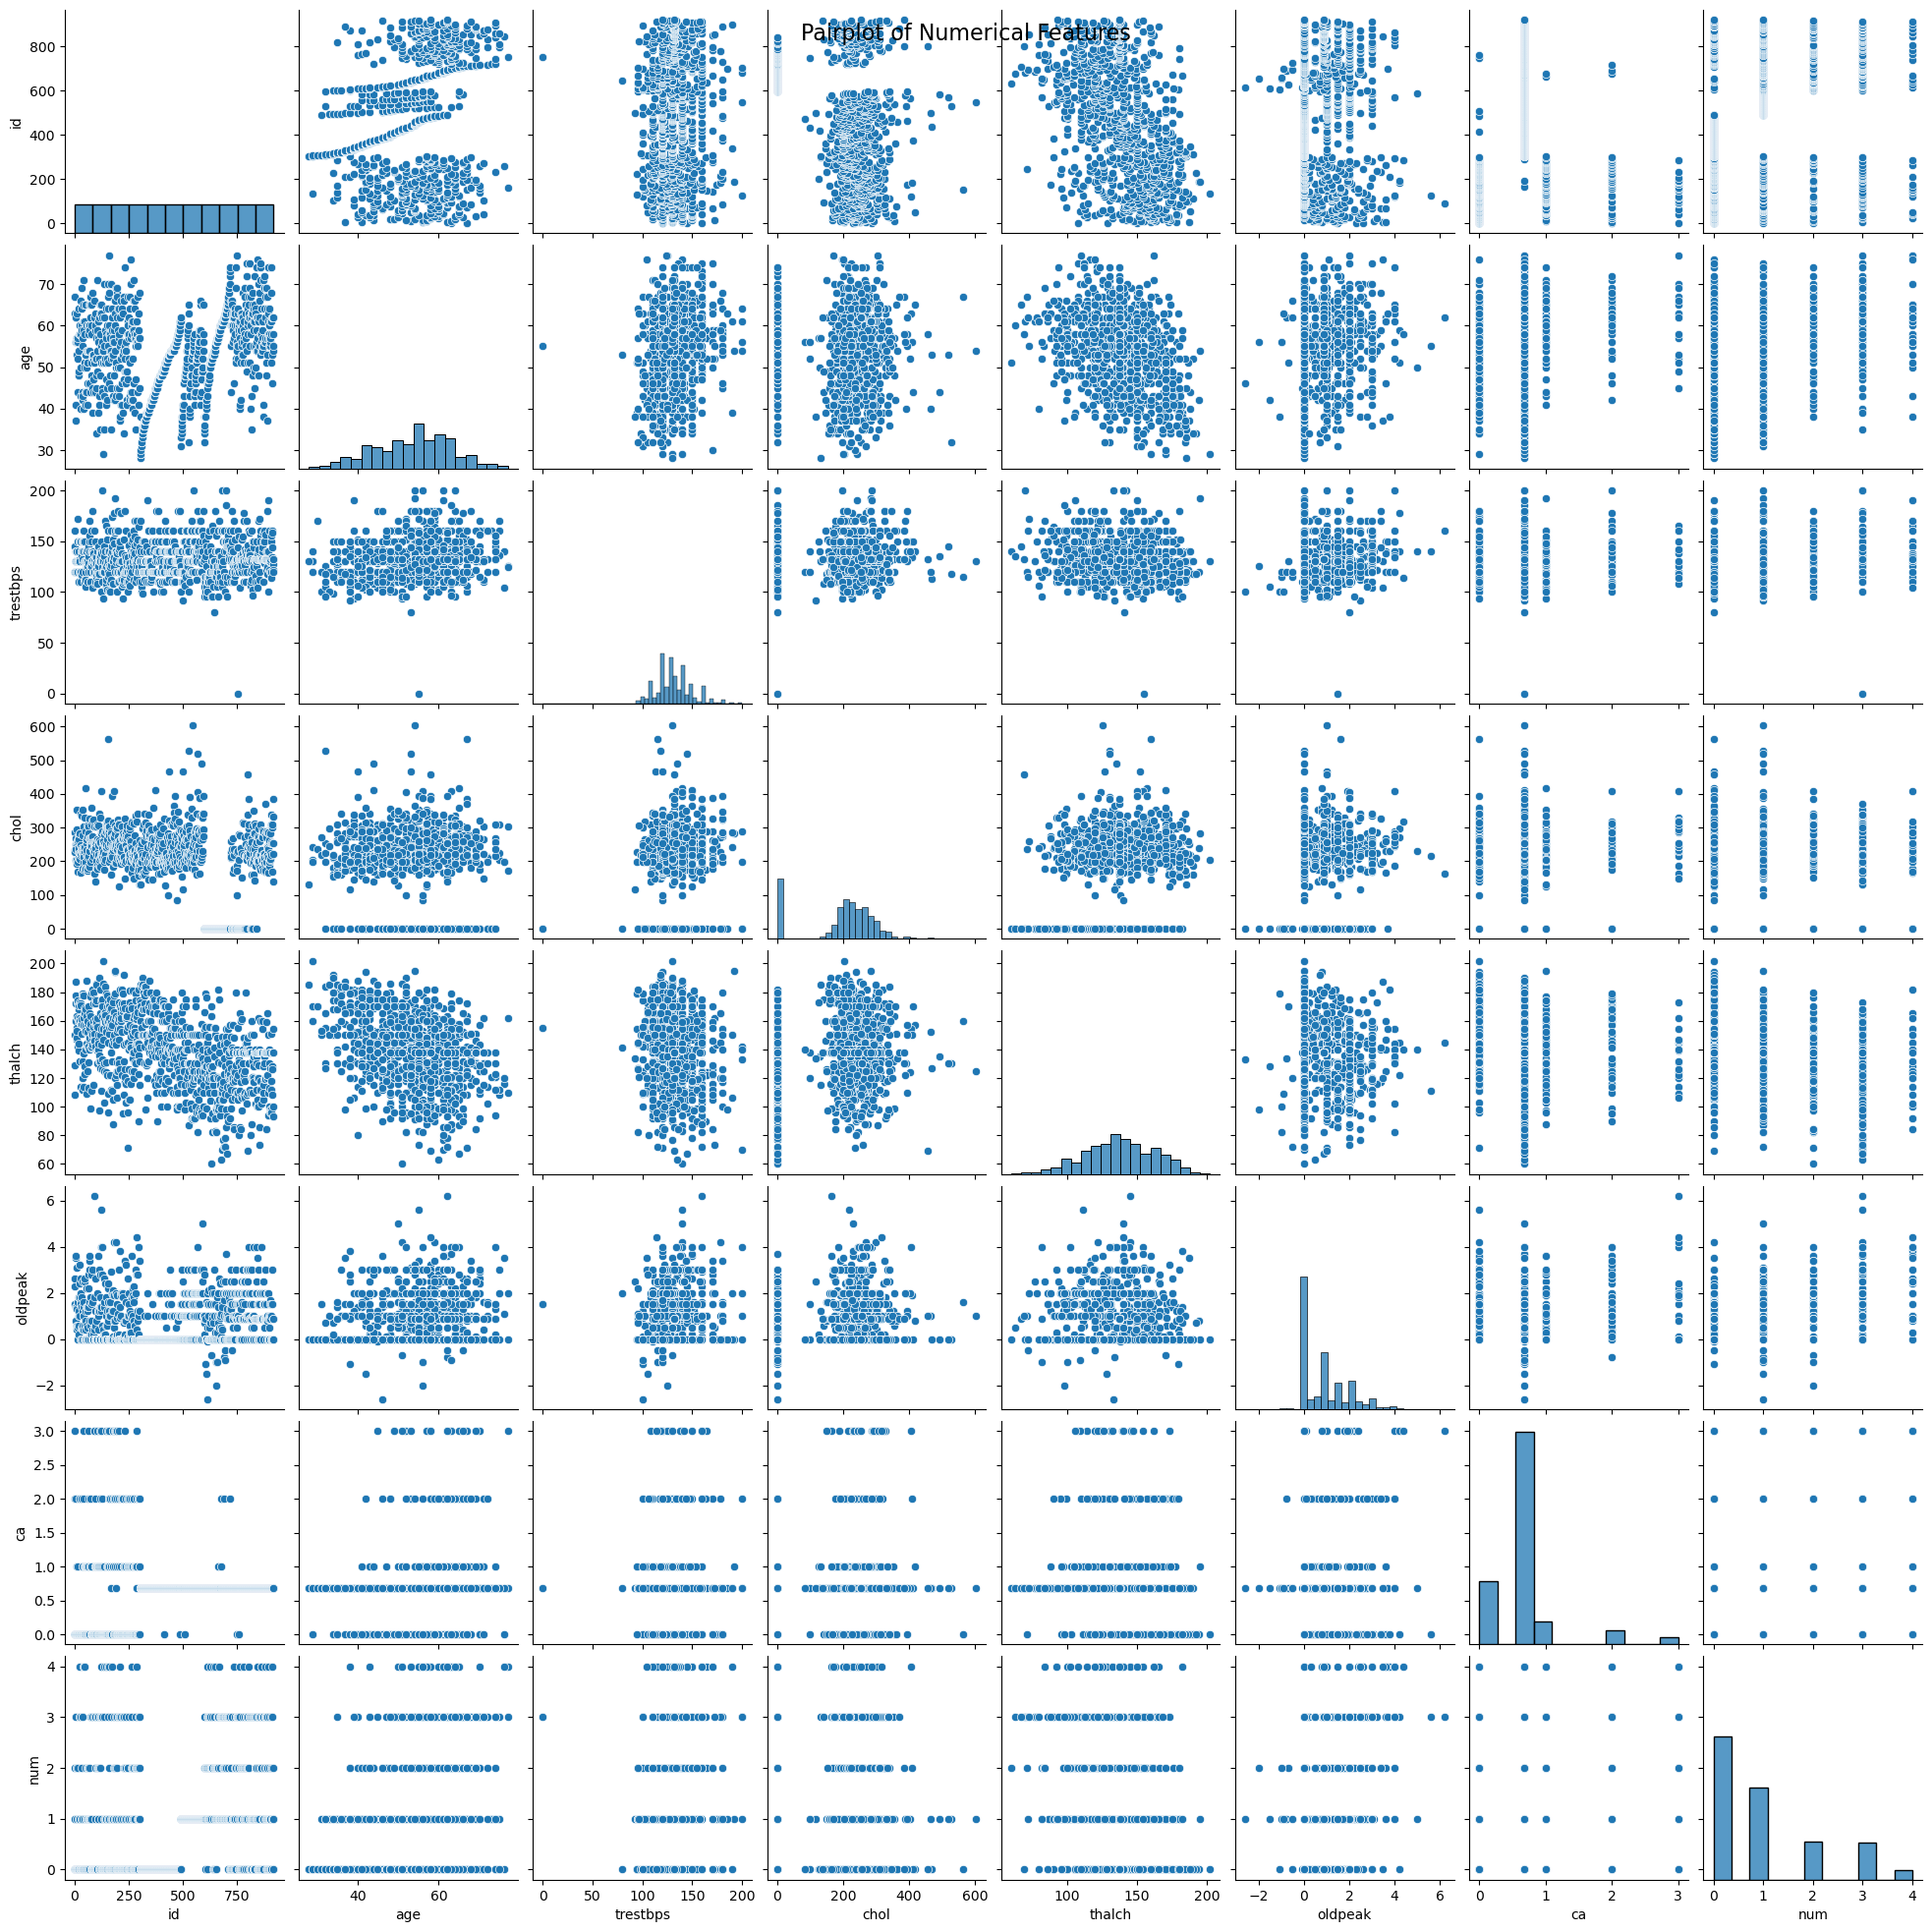

In [16]:
print("Pairplot of All Numerical Features:")
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', fontsize=16)
plt.show()

In [17]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()
print(correlation_matrix['num'])  # Correlation with the target variable 'num'


id          0.273552
age         0.339596
trestbps    0.116225
chol       -0.228238
thalch     -0.351055
oldpeak     0.421907
ca          0.321404
num         1.000000
Name: num, dtype: float64


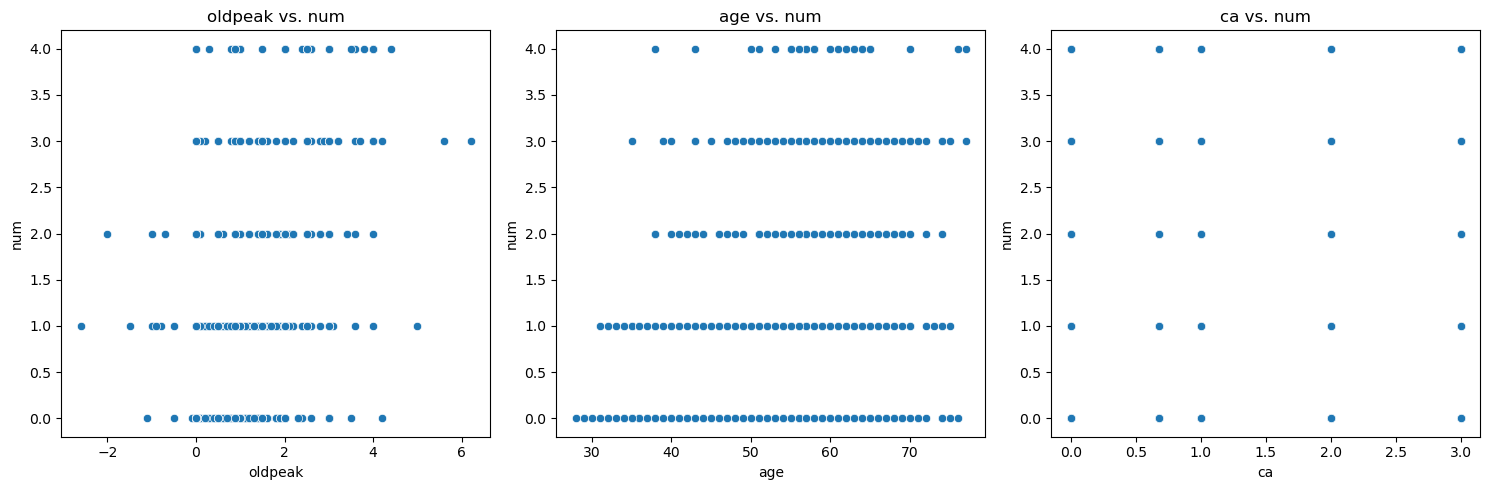

In [18]:
top_features = ['oldpeak', 'age', 'ca']
target = 'num'  # Heart disease presence


fig, axes = plt.subplots(1, len(top_features), figsize=(15, 5))  
# Loop through features to create scatter plots
for i, feature in enumerate(top_features):
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f'{feature} vs. {target}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show()

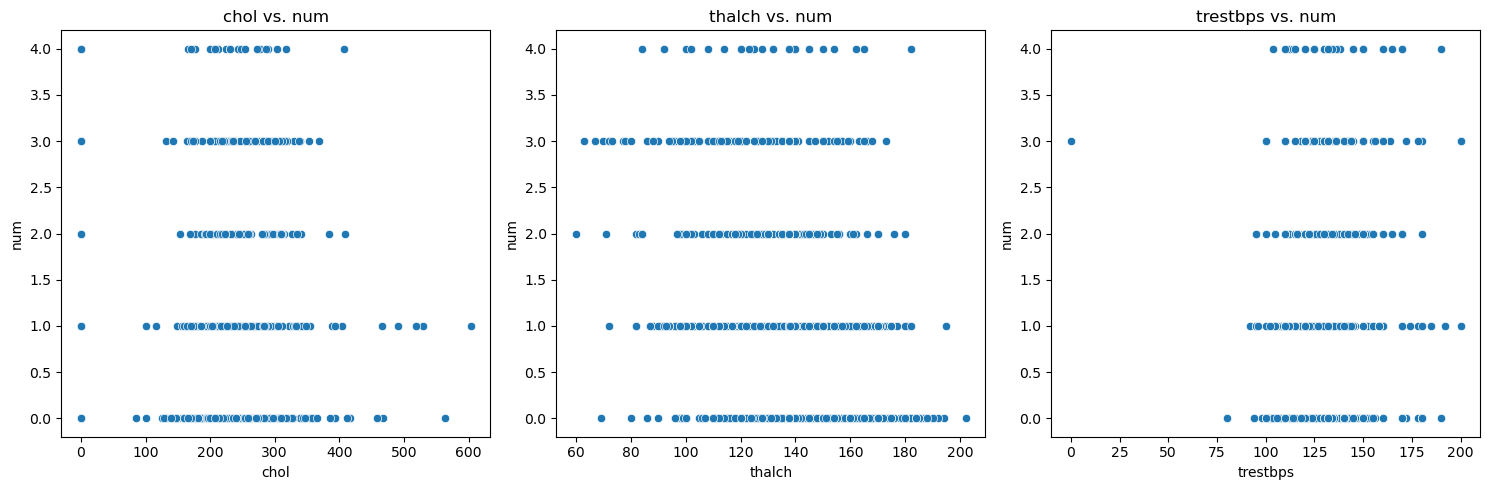

In [19]:
least_features = ['chol', 'thalch', 'trestbps']
target = 'num'  # Heart disease presence


fig, axes = plt.subplots(1, len(least_features), figsize=(15, 5))  
# Loop through features to create scatter plots
for i, feature in enumerate(least_features):
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f'{feature} vs. {target}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show()

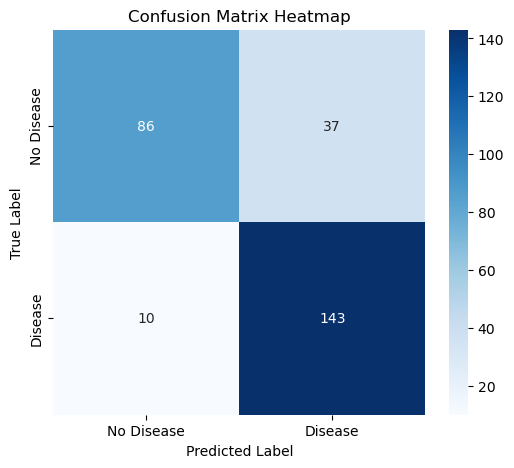

In [20]:
#Heatmap
conf_matrix = np.array([[86, 37], 
                        [10, 143]])

# Create Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Disease", "Disease"], 
            yticklabels=["No Disease", "Disease"])

# Labels and Title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")

# Show Plot
plt.show()